## Exploratory Data Analysis

### Importing libraries

In [1]:
# import libraries as needed

### 1. Read in the data set and perform preliminary checks

In [2]:
import pandas as pd 

# how many samples do we have?
# how many features do we have?
# what are the classes 
# how many classes do we have?
# how many samples of each class? are they balanced?

# read the dataset
df = pd.read_csv("iris.csv")
print(df)

classes = pd.unique(df['variety'])
num_classes = len(classes)
each_class = df['variety'].value_counts()

print(classes)
print(num_classes)
print(each_class)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]
['Setosa' 'Versicolor' 'Virginica']
3
Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64


In [3]:
print(df.info())

# what are the names of the features
# what are the types of fetures?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [4]:
# change categorical values of variety to numeric values

from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
df['variety'] = labelencoder.fit_transform(df['variety']) #fitting and transforming the desired categorical column.

print(df['variety'].unique())

df

[0 1 2]


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 2. Check missing values, outliers and statistics

In [5]:
# are there any missing values?
# if so, what are you going to do about the missing values?

df.isna().apply(pd.value_counts)

,sepal.length,sepal.width,petal.length,petal.width,variety
False,150,150,150,150,150


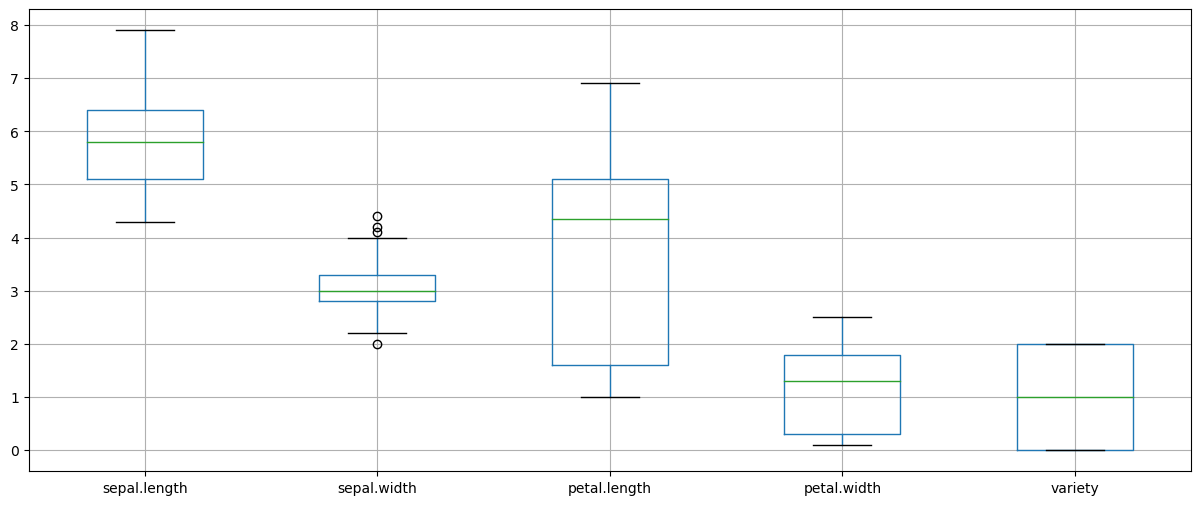

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
variety,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [6]:
from matplotlib import pyplot as plt

# are there outliers?
# if so, what are you going to do about the outliers
# are there anomolies in the statistics?
# if so, what are you going to do about the outliers

df.boxplot(figsize = (15,6))

#plt.savefig('plots/i0.png')
plt.show()
df.describe().T


In [7]:
#IQR is the interquartile range

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# let's see how many outliers are in every column
df2 = ((df < (Q1 - 1.5 * IQR)).sum()) 
df3 = ((df > (Q3 + 1.5 * IQR)).sum())
print(df2)
print(df3)

sepal.length    0
sepal.width     1
petal.length    0
petal.width     0
variety         0
dtype: int64
sepal.length    0
sepal.width     3
petal.length    0
petal.width     0
variety         0
dtype: int64


### 3. Check distributions and coorelations

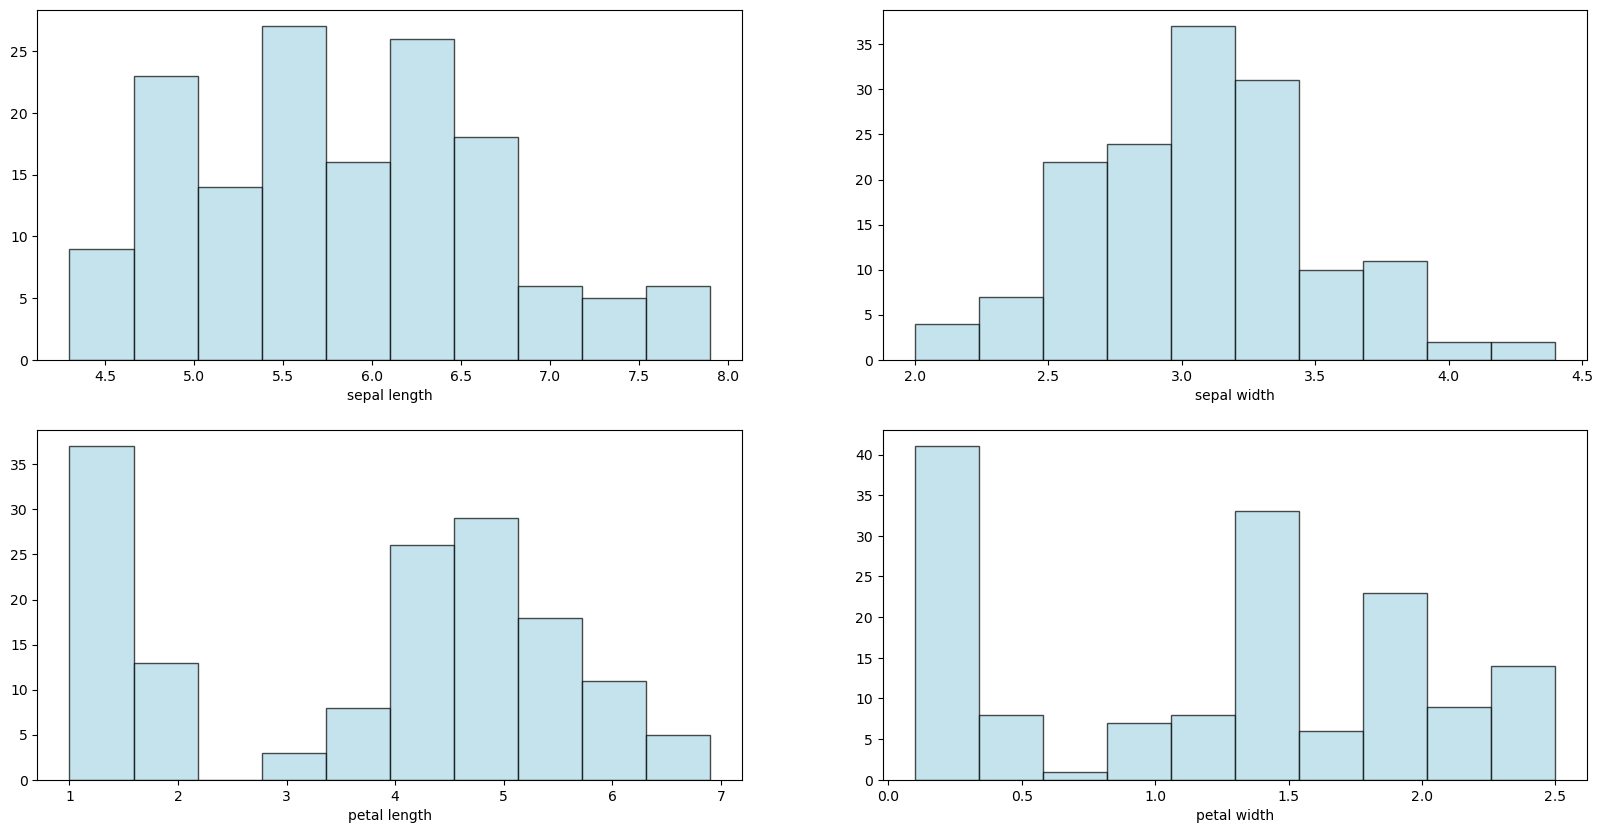

In [8]:
# what kind of distributions do the features have?

plt.figure(figsize= (20,10))
plt.subplot(2, 2, 1)
plt.hist(df['sepal.length'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('sepal length')

plt.subplot(2, 2, 2)
plt.hist(df['sepal.width'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('sepal width')

plt.subplot(2,2,3)
plt.hist(df['petal.length'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('petal length')

plt.subplot(2,2,4)
plt.hist(df['petal.width'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('petal width')
#plt.savefig('plots/i1.png')
plt.show()

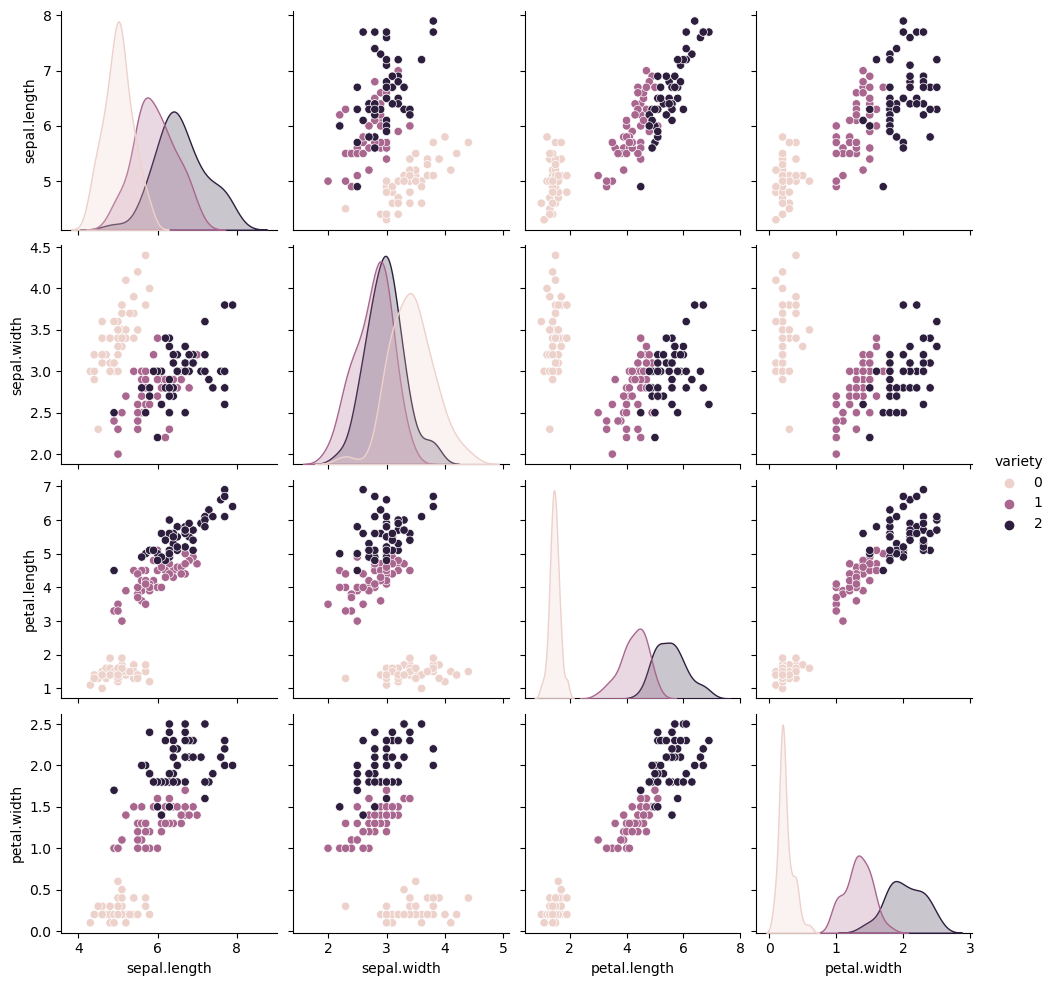

In [9]:
import seaborn as sns

# what kind of correlation does the data exhibit?

sns.pairplot(df, hue='variety')  #pairplot
#plt.savefig('plots/pairplot.png')
plt.show()

We can see that class 0 is cleary seperate and class 1 and 2 are tangled.

In [10]:
df.corr()

,sepal.length,sepal.width,petal.length,petal.width,variety
sepal.length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal.width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal.length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal.width,0.817941,-0.366126,0.962865,1.000000,0.956547
variety,0.782561,-0.426658,0.949035,0.956547,1.000000


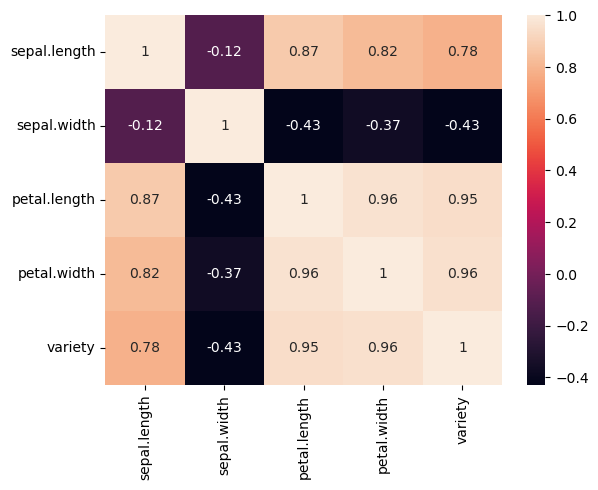

In [11]:
sns.heatmap(df.corr(), annot=True)
plt.show()

As we can see, a high positive correlation indicates that the two elements have 
a positive linear relationship (as one increases the other also increases), 
and a low negative correlation indicates a negative linear relationship (as one increases the other decreases).

A high positive correlation indicates that the two elements have a positive linear relationship (most relevant to the class), and a low negative correlation indicates a negative linear relationship (least relevant to the class).

In [12]:
### 4. Perform feature selection (sub set of original)

In [13]:
### 5. Perform feature extraction (transform original data, e.g. avg

In [14]:
### 6. Perform dimensionality reduction (3D to 2D for example)

In [15]:
### 7. Perform sampling (subset from statistical population)